# Chapter 4 - Activation functions

Activations functions in neural network enables them to solve non-linear problems. Regardless the number of hidden layers, without activation functions the neural network will behave like a linear regression model. Applying consecutively linear transformations results in a linear transformations.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Step function

Showcases what an activations function is. However it isn't great in practices as it is something that is hard to optimize. Since the activation functions is binary (producing `0` or `1`), it is hard to determine how far the model is from the target value.

**Dead neurons** is whenever a given neuron remains de-activated, and keep producing `0`, regardless its input. This is problematic as it's weights stop being updated during training (grandient of `0` is `0`). This significatnly deteriates the neural network trainability.


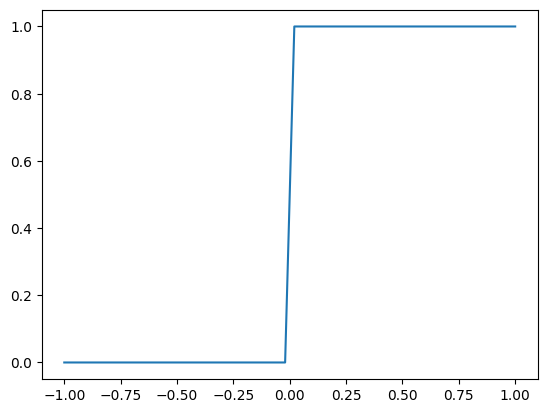

In [2]:
x = np.linspace(-1, 1)

y = np.array(x)
y[y < 0] = 0
y[y > 0] = 1

plt.plot(x, y)
plt.show()

## Sigmoid & logistic function

In ML, the sigmoid functions is often used interchangably with the logistic function. Sigmoids are a class of function following an `S` shaped curve.

The logistic function specific sigmoid function. The ranging from `0` (- infinity) to `1` (+ infinity) with `0.5` at center. Other sigmoids includes: hyperbolic tangent (`TanH`) and arctangent (`ArcTan`)

It isn't practical to use the logistic function:

- Vanishing gradient: When the input is very large (positive or negative), the gradient is small. It can yeild to a model very slow to train.
- No zero-centered: Unlike other activation function, it's mid-value is `0.5`. Since the activation function is always greater than `0` the neuron is always activated
  - Question: Is it truely an issue in practice?
- Computationaly expensive: Sigmoid involves and expenential operation, which isn't great for performance compared to other simpler activation functions.


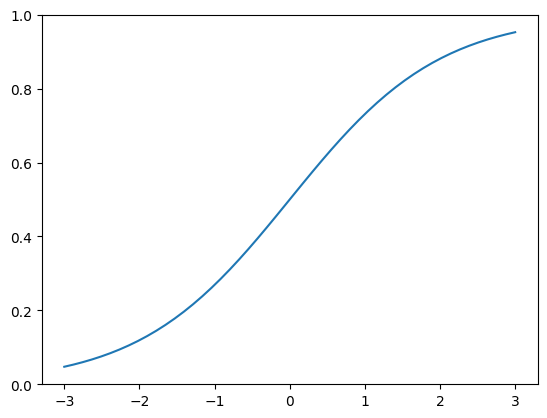

In [3]:
x = np.linspace(-3, 3)
n = x.size
y = np.ones(n) / (np.ones(n) + np.exp(-x))

plt.plot(x, y)
plt.ylim(0, 1)
plt.show()

## ReLU

ReLU or REctified Linear Unit it is today's go-to hidden layers activation functions:

- Less costly to compute: it's just a max value comparison
- Solves the vanishing gradient: it doesn't saturate on large values.
- Sparse activation: only activate on a certain range (otherwise `0`)
  - Question: Why is it a good property? Is is mentioned that it improve model training by introducing sparcity.

Similar to the step function it also suffers from the dead nearon, aka dying ReLU, if a large number of neurons never activate.


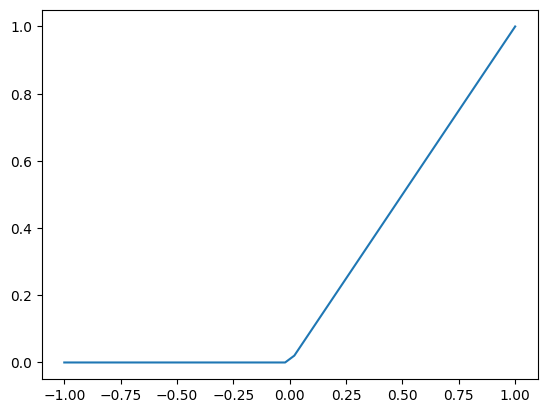

In [4]:
x = np.linspace(-1, 1)
y = np.maximum(x, 0)

plt.plot(x, y)
plt.show()

## Leaky ReLU

Similar to the ReLU but with a small gradient for values below `0` to reduce the dying ReLU issue.
The downside with this approach is that the slope factor has to be fined tuned.


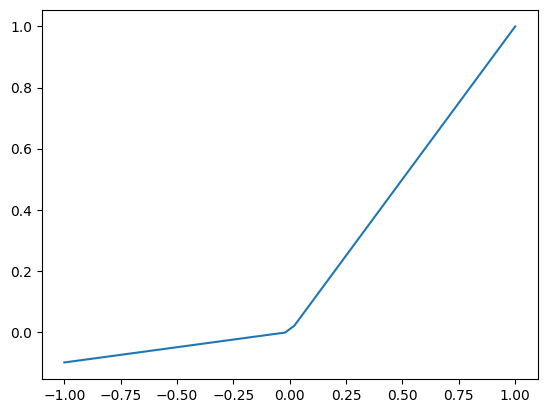

In [5]:
alpha = 0.1

x = np.linspace(-1, 1)
y = np.maximum(x, alpha * x)

plt.plot(x, y)
plt.show()

## Softmax


It's primarily used as activation function of the output layer for a classification use case.

It's the average exponented value. Unlike the identity and ReLU activations functions that are unbounded, softmax always produce values between `0` and `1`. And the sum of all the values produce by a softmax layer is always equal to `1`. It turns unbounded values to a probability distribution.


In [6]:
layer_outputs = [4.8, 1.21, 2.385]

exp_outputs = np.exp(layer_outputs)
norm_outputs = exp_outputs / np.sum(exp_outputs)

print("Softmax output:", norm_outputs)
print("Sum softmax output:", np.sum(norm_outputs))

Softmax output: [0.89528266 0.02470831 0.08000903]
Sum softmax output: 0.9999999999999999


## Implementation


In [7]:
import nnfs
from nnfs.datasets import spiral_data

WEIGHTS_INIT_FACTOR = 0.01


class DenseLayer:
    def __init__(self, n_inputs: int, n_neurons: int):
        self.weights = WEIGHTS_INIT_FACTOR * np.random.randn(n_inputs, n_neurons)
        self.baises = np.zeros((1, n_neurons))

    def forward(self, inputs: np.ndarray):
        self.output = np.dot(inputs, self.weights) + self.baises


class ActivationReLU:
    def forward(self, inputs: np.ndarray):
        self.output = np.maximum(inputs, 0)


class ActivationSoftMax:
    def forward(self, inputs: np.ndarray):
        norm_outputs = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = norm_outputs / np.sum(norm_outputs, axis=1, keepdims=True)


nnfs.init()
samples, labels = spiral_data(samples=100, classes=3)

# Setup layers
layer1 = DenseLayer(n_inputs=2, n_neurons=3)
activation1 = ActivationReLU()
layer2 = DenseLayer(n_inputs=3, n_neurons=3)
activation2 = ActivationSoftMax()

# Layer 1 forward pass
layer1.forward(samples)
activation1.forward(layer1.output)

# Layer 2 forward pass
layer2.forward(activation1.output)
activation2.forward(layer2.output)

# Print the 5 first outputs
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333316 0.3333332  0.33333364]
 [0.33333287 0.3333329  0.33333418]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]
